# Hot 100 since 1958

Goals:

For next time:
1) find a dataset

2) Do basic EDA

3) Clean data and load into graph (MOST IMPORTANT PART: make sure it is actually a network we can work)

Research question, what is the goal, what do we wanna knnow etc.

Methods for doing the research

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib as plt
import itertools

In [2]:
df = pd.read_csv('charts.csv')
df

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


In [3]:
df[90:102]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
90,2021-11-06,91,No Friends In The Industry,Drake,87.0,11,8
91,2021-11-06,92,"Ya Superame (En Vivo Desde Culiacan, Sinaloa)",Grupo Firme,92.0,92,2
92,2021-11-06,93,Who's In Your Head,Jonas Brothers,96.0,93,3
93,2021-11-06,94,In The Bible,Drake Featuring Lil Durk & Giveon,94.0,7,8
94,2021-11-06,95,Just About Over You,Priscilla Block,100.0,95,3
95,2021-11-06,96,To Be Loved By You,Parker McCollum,NaN,96,1
96,2021-11-06,97,Ain't Shit,Doja Cat,NaN,24,14
97,2021-11-06,98,Life Goes On,Oliver Tree,NaN,91,2
98,2021-11-06,99,Come Through,H.E.R. Featuring Chris Brown,NaN,64,16
99,2021-11-06,100,Nevada,YoungBoy Never Broke Again,NaN,58,4


In [6]:
u = df['artist'].str.split('x|&|Featuring|With|,', expand = True).add_prefix('artist_')
test = u
#test = test.dropna(subset=['artist_1'])
#test = test.groupby('artist_0')['artist_1'].apply(','.join).reset_index()
test.head()

,artist_0,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9
0,Adele,None,None,None,None,None,None,None,None,None
1,The Kid LAROI,Justin Bieber,None,None,None,None,None,None,None,None
2,Lil Nas X,Jack Harlow,None,None,None,None,None,None,None,None
3,Walker Hayes,None,None,None,None,None,None,None,None,None
4,Ed Sheeran,None,None,None,None,None,None,None,None,None


In [8]:
# Create an empty list
Row_list =[]
  
# Iterate over each row
for index, rows in test.iterrows():
    # Create list for the current row
    my_list =[rows.artist_1, rows.artist_2, rows.artist_3, rows.artist_4, rows.artist_5, rows.artist_6, rows.artist_7, rows.artist_8, rows.artist_9]
      
    # append the list to the final list
    Row_list.append(my_list)
    
test['new_col'] = Row_list
test['new_col'] = test.new_col.apply(lambda x: [i for i in x if i != None])
test.head()

,artist_0,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,new_col
0,Adele,None,None,None,None,None,None,None,None,None,[]
1,The Kid LAROI,Justin Bieber,None,None,None,None,None,None,None,None,[ Justin Bieber]
2,Lil Nas X,Jack Harlow,None,None,None,None,None,None,None,None,[ Jack Harlow]
3,Walker Hayes,None,None,None,None,None,None,None,None,None,[]
4,Ed Sheeran,None,None,None,None,None,None,None,None,None,[]


In [9]:
test = test.drop(['artist_1', 'artist_2','artist_3','artist_4','artist_5','artist_6','artist_7','artist_8','artist_9'], axis=1)





In [10]:
text = test
text

,artist_0,new_col
0,Adele,[]
1,The Kid LAROI,[ Justin Bieber]
2,Lil Nas X,[ Jack Harlow]
3,Walker Hayes,[]
4,Ed Sheeran,[]
...,...,...
330082,Thurston Harris,[]
330083,Robert,[ Johnny]
330084,The Ames Brothers,[]
330085,Billy Williams,[]


In [11]:
music = text.groupby('artist_0')['new_col'].apply(lambda x: x.sum())

In [12]:
music = music.to_frame()
music = music.reset_index()
music

,artist_0,new_col
0,"""Groove"" Holmes",[]
1,"""Little"" Jimmy Dickens",[]
2,"""Pookie"" Hudson",[]
3,"""Weird Al"" Yankovic",[]
4,'N Sync,[]
...,...,...
8282,matchbo,"[ twenty, twenty, twenty, twenty, twenty, ..."
8283,t.A.T.u.,[]
8284,twenty one pilots,[]
8285,will.i.am,[]


In [13]:
links_explode = music.explode('new_col').reset_index(drop=True)
links_explode

,artist_0,new_col
0,"""Groove"" Holmes",NaN
1,"""Little"" Jimmy Dickens",NaN
2,"""Pookie"" Hudson",NaN
3,"""Weird Al"" Yankovic",NaN
4,'N Sync,NaN
...,...,...
81376,will.i.am,Nicki Minaj
81377,will.i.am,Nicki Minaj
81378,will.i.am,Nicki Minaj
81379,will.i.am,Nicki Minaj


In [14]:
#creating edges and lists
uni_edges = list(links_explode[['artist_0','new_col']].itertuples(index=False, name=None))

music['n_edges'] = music['artist_0'].apply(lambda x: len(x))

music_no_links = music[music['n_edges']==0]['artist_0'].values


In [15]:
music_no_links

array([], dtype=object)

In [16]:
music

,artist_0,new_col,n_edges
0,"""Groove"" Holmes",[],15
1,"""Little"" Jimmy Dickens",[],22
2,"""Pookie"" Hudson",[],15
3,"""Weird Al"" Yankovic",[],19
4,'N Sync,[],7
...,...,...,...
8282,matchbo,"[ twenty, twenty, twenty, twenty, twenty, ...",7
8283,t.A.T.u.,[],8
8284,twenty one pilots,[],17
8285,will.i.am,[],9


In [17]:
#setting up network
G = nx.DiGraph()
G.add_nodes_from(music['artist_0'].values)
G.add_edges_from(uni_edges)

#removing nodes without any link
G.remove_nodes_from(music_no_links)

In [18]:
print('Q: What is the number of nodes in the network?')
print('A: The number of nodes in the network is:', G.number_of_nodes())

Q: What is the number of nodes in the network?
A: The number of nodes in the network is: 10750


In [19]:
print('Q: More importantly, what is the number of links?')
print('A: The number of links in the network is:', G.number_of_edges())

Q: More importantly, what is the number of links?
A: The number of links in the network is: 11058


In [31]:
links_explode

,artist_0,new_col
0,"""Groove"" Holmes",NaN
1,"""Little"" Jimmy Dickens",NaN
2,"""Pookie"" Hudson",NaN
3,"""Weird Al"" Yankovic",NaN
4,'N Sync,NaN
...,...,...
81376,will.i.am,Nicki Minaj
81377,will.i.am,Nicki Minaj
81378,will.i.am,Nicki Minaj
81379,will.i.am,Nicki Minaj


In [20]:
import matplotlib.pyplot as plt

Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution


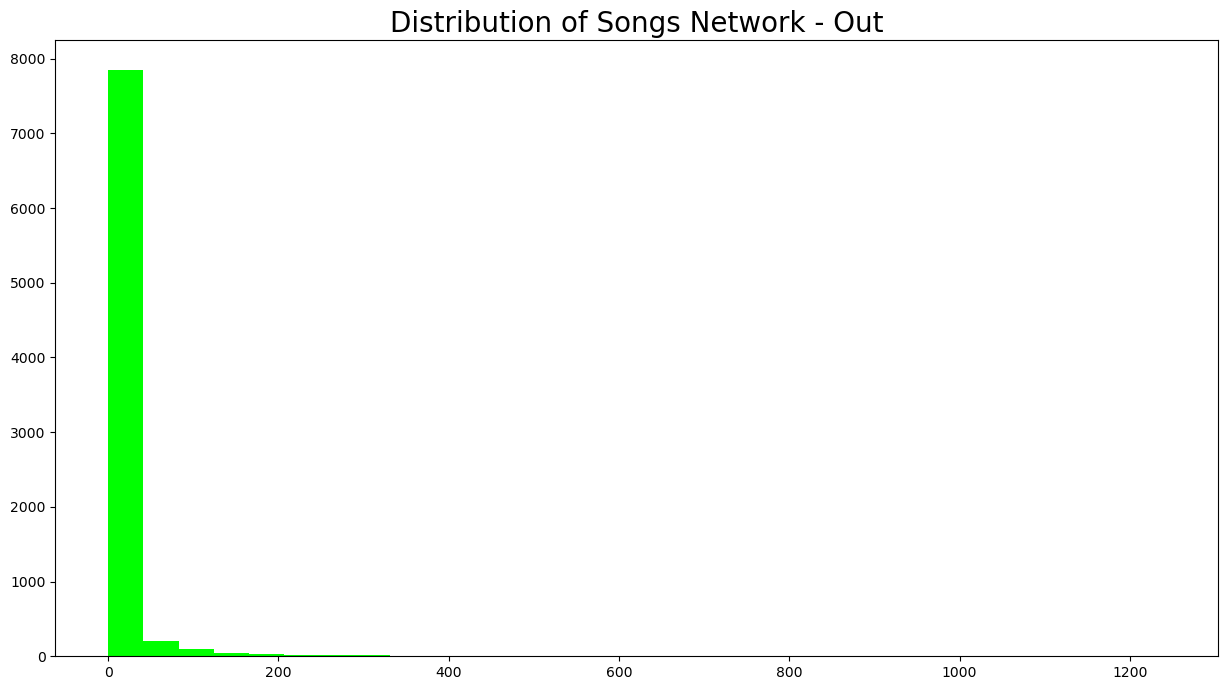

In [35]:
print('Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution')


grouping = links_explode.groupby('artist_0').count().values

plt.rcParams["figure.figsize"] = (15,8)
plt.hist(grouping , bins = 30, color = 'lime')
plt.title("Distribution of Songs Network - Out", fontsize=20)
plt.savefig('out_plot.png', transparent=True)
plt.show()


Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution


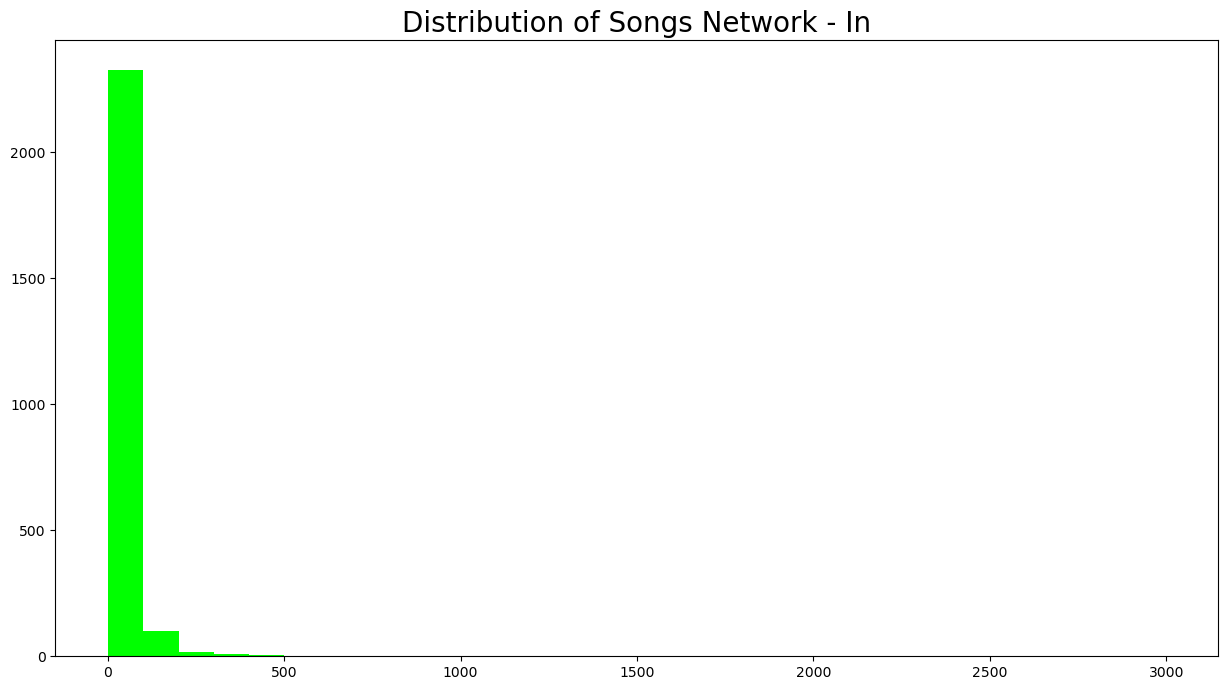

In [32]:
print('Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution')


grouping = links_explode.groupby('new_col').count().values

plt.rcParams["figure.figsize"] = (15,8)
plt.hist(grouping , bins = 30, color='lime')
plt.title("Distribution of Songs Network - In", fontsize=20)
plt.show()

In [23]:
print('Who are the top 5 most connected Marvel characters (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?')
print('')
print('In:',links_explode.groupby('artist_0').count().sort_values('new_col', ascending=False).head())

Who are the top 5 most connected Marvel characters (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?

In:               new_col
artist_0             
DJ Khaled        1241
Drake             920
Earth             764
Chris Brown       625
Pitbull           524
